<a href="https://colab.research.google.com/github/joost0252/DMML2022_Tudor/blob/main/Data_Mining_%26_Machine_Learning_Project_Conv1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install and update spaCy
!pip install -U spacy

# Download the english language model
!python -m spacy download en
!python -m spacy download fr_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-18 21:24:54.497631: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 2.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-18 21:25:08.305972: E tensorflow/stream_executor/cuda/cuda_driv

In [ ]:
!pip install spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
import spacy_transformers
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
corpus = pd.read_csv("training_data.csv")

In [ ]:
unlabel_data_LR = pd.read_csv("unlabelled_test_data.csv")
unlabel_data_LR.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
unlabel_data_knn = unlabel_data_LR.copy()
unlabel_data_knn.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
unlabel_data_tree = unlabel_data_LR.copy()
unlabel_data_tree.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
unlabel_data_forest = unlabel_data_LR.copy()
unlabel_data_forest.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [ ]:
submission_data = pd.read_csv('sample_submission.csv')
submission_data.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem?

In [ ]:
np.random.seed = 0

In [ ]:
base_rate = corpus['difficulty'].value_counts()/len(corpus['difficulty'])
base_rate.round(4)

A1    0.1694
C2    0.1681
C1    0.1662
B1    0.1656
A2    0.1656
B2    0.1650
Name: difficulty, dtype: float64

In [ ]:
 print(f"Base Rate:\n{base_rate.max()*100}%")

Base Rate:
16.9375%


#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [ ]:
tfidf_vector = TfidfVectorizer()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [ ]:
# IN ordinal Encoder an order of categories can be count and can set

oe=OrdinalEncoder()
# set the order of your categories
oe.set_params(categories= [['A1', 'A2', 'B1', 'B2', 'C1', 'C2']])

# fit-transform a dataframe of the categorical age variable
oe_difficulty = oe.fit_transform(corpus[['difficulty']])

corpus['difficulty'] = pd.DataFrame(oe_difficulty).astype('int')


In [ ]:
X = corpus['sentence']
y= corpus['difficulty']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

In [ ]:
y_train

70      0
4347    3
1122    4
4570    0
34      5
       ..
1033    3
3264    1
1653    4
2607    3
2732    2
Name: difficulty, Length: 3840, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
classifier = LogisticRegression()

In [ ]:
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def evaluate(true, pred):
    precision = precision_score(true, pred, average='micro')
    recall = recall_score(true, pred,average='micro')
    f1 = f1_score(true, pred, average='micro')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true,pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

#### Calculate accuracy, precision, recall and F1 score on the test set.


In [ ]:
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[93 31 21 10  4  2]
 [54 60 30  6  6  8]
 [12 38 64 17  9 20]
 [ 6  6 15 66 27 24]
 [ 4  4 10 37 73 45]
 [ 7  8  8 19 24 92]]
ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4667
	Recall: 0.4667
	F1_Score: 0.4667


In [ ]:
accuracyscore_lr = accuracy_score(y_pred, y_test)

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

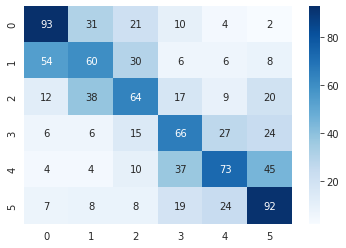

In [ ]:
cnf_matrix = sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Blues', fmt='.5g');

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55       161
           1       0.41      0.37      0.39       164
           2       0.43      0.40      0.42       160
           3       0.43      0.46      0.44       144
           4       0.51      0.42      0.46       173
           5       0.48      0.58      0.53       158

    accuracy                           0.47       960
   macro avg       0.46      0.47      0.46       960
weighted avg       0.47      0.47      0.46       960



In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [ ]:
print(FP)

[83 87 84 89 70 99]


In [ ]:
print(TP)

[93 60 64 66 73 92]


In [ ]:
#Examples of sentences that are not well classified.
X_test[y_test != y_pred].head()

2255    C'est en décembre 1967, après bien des invecti...
608     Giscard va pourtant réussir à transformer ce r...
2856    Un choix difficile mais important : le public ...
1889    Le débat porte plutôt sur l'utilité d'une tell...
2358    Il faut du temps et du courage pour soigner to...
Name: sentence, dtype: object

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [ ]:
unlabel_data_LR['difficulty'] = pipe.predict(unlabel_data_LR['sentence'])

In [ ]:
unlabel_data_LR

,id,sentence,difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,5
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,1
2,2,"Et, paradoxalement, boire froid n'est pas la b...",0
3,3,"Ce n'est pas étonnant, car c'est une saison my...",0
4,4,"Le corps de Golo lui-même, d'une essence aussi...",5
...,...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...,5
1196,1196,Je vais parler au serveur et voir si on peut d...,1
1197,1197,Il n'était pas comme tant de gens qui par pare...,5
1198,1198,Ils deviennent dangereux pour notre économie.,4


In [ ]:
unlabel_data_LR['difficulty'] = unlabel_data_LR['difficulty'].astype('category').cat.rename_categories(["A1", "A2", "B1", "B2", "C1", "C2"])

In [ ]:
unlabel_data_LR

,id,sentence,difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,C2
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,A2
2,2,"Et, paradoxalement, boire froid n'est pas la b...",A1
3,3,"Ce n'est pas étonnant, car c'est une saison my...",A1
4,4,"Le corps de Golo lui-même, d'une essence aussi...",C2
...,...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...,C2
1196,1196,Je vais parler au serveur et voir si on peut d...,A2
1197,1197,Il n'était pas comme tant de gens qui par pare...,C2
1198,1198,Ils deviennent dangereux pour notre économie.,C1


In [ ]:
#We want here to take a quick look to how accurate are our predictions. 
probability_class_LR = np.max(pipe.predict_proba(unlabel_data_LR['sentence']), axis=1)
probability_class_LR
print("Minimum value:",pd.array(probability_class_LR).min().round(2))
print("Maxmium value:",pd.array(probability_class_LR).max().round(2))
#As we can see depending on the row the probability of the predicted value goes from 19% to 82% but always above the baserate.

Minimum value: 0.19
Maxmium value: 0.82


In [ ]:
predictionsLR = unlabel_data_LR.drop(columns=["sentence"])

In [ ]:
#unlabel_data.to_csv(r"C:\Users\joost\OneDrive\Documenten\Studie\Master Supply Chain Management\QTEM\Data Mining and Machine Learning\Project\Predictions_LR.csv", index=False)
predictionsLR.to_csv("Predictions_LR_tudor.csv", index=False)

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#We start with a value of p of default 2 and knn neighbours of default 5.
knn = KNeighborsClassifier(n_neighbors=5, weights = "uniform", p=2)

In [ ]:
pipe_knn = Pipeline([('vectorizer', tfidf_vector),
                 ('KNN', knn)])

# Fit model on training set
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])

In [ ]:
# Predictions
y_pred_knn = pipe_knn.predict(X_test)

In [ ]:
evaluate(y_test, y_pred_knn)

CONFUSION MATRIX:
[[121  28   8   1   1   2]
 [ 98  51  12   1   1   1]
 [ 81  39  33   3   1   3]
 [ 49  30  19  29   3  14]
 [ 48  36  29  15  29  16]
 [ 37  29  17  23   9  43]]
ACCURACY SCORE:
0.3187
CLASSIFICATION REPORT:
	Precision: 0.3187
	Recall: 0.3187
	F1_Score: 0.3187


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define a grid of possible values for p
param_grid = {"KNN__p": [1, 2,]}

# Use GridSearchCV to search for the best value of p
grid = GridSearchCV(pipe_knn, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best value of p found by the grid search
print("Best value of p: ", grid.best_params_["KNN__p"])

KeyboardInterrupt: ignored

In [ ]:
# Define a grid of possible values for the weights
param_grid = {"KNN__weights": ['uniform', 'distance',]}

# Use GridSearchCV to search for the best weights
grid = GridSearchCV(pipe_knn, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best weight parameter found by the grid search
print("Best weights: ", grid.best_params_["KNN__weights"])

In [ ]:
# Now that we know the best value for p and the best weight parameter let's find out the best value for the neighbours. 

for k in [1, 3, 5, 7, 9, 11, 13, 15]:
  knn = KNeighborsClassifier(n_neighbors=k, weights = "distance", p = 2)
  pipe_knn = Pipeline([('vectorizer', tfidf_vector),
                 ('KNN', knn)])

# Fit model on training set
  pipe_knn.fit(X_train, y_train)
  # Predictions
  y_pred_knn = pipe_knn.predict(X_test)
  print(f"ACCURACY SCORE(k={k}, p=2):\n{accuracy_score(y_test, y_pred_knn):.4f}")

In [ ]:
#Now we have our best classifier:
knn2 = KNeighborsClassifier(n_neighbors=5, weights = "distance", p=2)
pipe_knn2 = Pipeline([('vectorizer', tfidf_vector),
                 ('KNN', knn2)])

# Fit model on training set
pipe_knn2.fit(X_train, y_train)
y_pred_knn2 = pipe_knn2.predict(X_test)
evaluate(y_test, y_pred_knn2)

In [ ]:
accuracyscore_knn = accuracy_score(y_pred_knn2, y_test)

In [ ]:
#The accuracy has improved by 3 percentual points. 

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [ ]:
unlabel_data_knn['difficulty'] = pipe_knn2.predict(unlabel_data_knn['sentence'])

In [ ]:
unlabel_data_knn['difficulty'] = unlabel_data_knn['difficulty'].astype('category').cat.rename_categories(["A1", "A2", "B1", "B2", "C1", "C2"])

In [ ]:
#We want here to take a quick look to how accurate are our predictions. 
probability_class_knn = np.max(pipe_knn2.predict_proba(unlabel_data_knn['sentence']), axis=1)
print("Minimum value:",pd.array(probability_class_knn).min().round(2))
print("Maxmium value:",pd.array(probability_class_knn).max().round(2))
#As we can see depending on the row the probability of the predicted value goes from 20% to 100% but always above the baserate.

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier()

In [ ]:
pipe_tree = Pipeline([('vectorizer', tfidf_vector),
                 ('Tree', tree)])

# Fit model on training set
pipe_tree.fit(X_train, y_train)

In [ ]:
y_pred_tree = pipe_tree.predict(X_test)

In [ ]:
evaluate(y_test, y_pred_tree)

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
# Define a grid of possible depths:
param_grid = {"Tree__max_depth": [1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]}

# Use GridSearchCV to search for the best number of maximal depths:
grid = GridSearchCV(pipe_tree, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best value of the max depth found by the grid search
print("Best value depth: ", grid.best_params_["Tree__max_depth"])

In [ ]:
#Now we have our best classifier:
tree2 = DecisionTreeClassifier(max_depth=15, random_state=0)
pipe_tree2 = Pipeline([('vectorizer', tfidf_vector),
                 ('Tree', tree2)])

# Fit model on training set
pipe_tree2.fit(X_train, y_train)
y_pred_tree2 = pipe_tree2.predict(X_test)
evaluate(y_test, y_pred_tree2)

In [ ]:
#The accuracy has improved by almost two percentual points.

In [ ]:
accuracyscore_tree = accuracy_score(y_pred_tree2, y_test)

Generate your  predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

Generate your  predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [ ]:
unlabel_data_tree['difficulty'] = pipe_tree2.predict(unlabel_data_tree['sentence'])

In [ ]:
unlabel_data_tree['difficulty'] = unlabel_data_tree['difficulty'].astype('category').cat.rename_categories(["A1", "A2", "B1", "B2", "C1", "C2"])

In [ ]:
#We want here to take a quick look to how accurate are our predictions. 
probability_class_tree = np.max(pipe_tree2.predict_proba(unlabel_data_tree['sentence']), axis=1)
print("Minimum value:",pd.array(probability_class_tree).min().round(2))
print("Maxmium value:",pd.array(probability_class_tree).max().round(2))
#As we can see depending on the row the probability of the predicted value goes from 23% to 100% but always above the baserate.

#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()

In [ ]:
pipe_forest = Pipeline([('vectorizer', tfidf_vector),
                 ('clf', forest)])

# Fit model on training set
pipe_forest.fit(X_train, y_train)
y_pred_forest = pipe_forest.predict(X_test)
evaluate(y_test, y_pred_forest)

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
# Define a grid 
param_grid = {"clf__max_depth": [None,1, 2,3,4,5,6,7,8,9,10],"clf__n_estimators": [10,50,100,200],"clf__min_samples_split": [2,5,10],"clf__min_samples_leaf": [1,2,5]}

# Use GridSearchCV to search for the best value of p
grid = GridSearchCV(pipe_forest, param_grid, cv=5)
grid.fit(X_train, y_train)

In [ ]:
# Print the best value of the parameters found by the grid search
print("Best hyperparameters: ", grid.best_params_)

In [ ]:
#Now we have our best classifier:
forest2 = RandomForestClassifier(max_depth=None, n_estimators=200,min_samples_split=2,min_samples_leaf=2)
pipe_forest2 = Pipeline([('vectorizer', tfidf_vector),
                 ('clf', forest2)])

# Fit model on training set
pipe_forest2.fit(X_train, y_train)
y_pred_forest2 = pipe_forest2.predict(X_test)
evaluate(y_test, y_pred_forest2)

In [ ]:
accuracyscore_forest = accuracy_score(y_pred_forest2, y_test)

Generate your  predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [ ]:
unlabel_data_forest['difficulty'] = pipe_forest2.predict(unlabel_data_forest['sentence'])

In [ ]:
unlabel_data_forest['difficulty'] = unlabel_data_forest['difficulty'].astype('category').cat.rename_categories(["A1", "A2", "B1", "B2", "C1", "C2"])

In [ ]:
#We want here to take a quick look to how accurate are our predictions. 
probability_class_forest = np.max(pipe_forest2.predict_proba(unlabel_data_tree['sentence']), axis=1)
print("Minimum value:",pd.array(probability_class_forest).min().round(2))
print("Maxmium value:",pd.array(probability_class_forest).max().round(2))
#As we can see depending on the row the probability of the predicted value goes from 17% to 69% but always above the baserate.

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [ ]:
corpus_NN = pd.read_csv("training_data.csv")

In [ ]:
# IN ordinal Encoder an order of categories can be count and can set
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
oe=OrdinalEncoder()
# set the order of your categories
oe.set_params(categories= [['A1', 'A2', 'B1', 'B2', 'C1', 'C2']])

# fit-transform a dataframe of the categorical age variable
oe_difficulty = oe.fit_transform(corpus_NN[['difficulty']])

corpus_NN['difficulty'] = pd.DataFrame(oe_difficulty).astype('int')

In [ ]:
X = corpus_NN['sentence']
y = corpus_NN['difficulty']


In [ ]:
length = corpus_NN['sentence'].str.len()
pd.DataFrame(length)


,sentence
0,255
1,62
2,66
3,40
4,209
...,...
4795,165
4796,118
4797,80
4798,226


In [ ]:
import torch
torch.manual_seed(0)
import torch.nn as nn

In [ ]:
#Using tfidfVectorizer on X_train, 
from sklearn.feature_extraction.text import TfidfVectorizer 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer() 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(X)

In [ ]:
tfidf_vectorizer_vectors

<4800x14585 sparse matrix of type '<class 'numpy.float64'>'
	with 76109 stored elements in Compressed Sparse Row format>

In [ ]:
df = pd.DataFrame(tfidf_vectorizer_vectors.todense(), columns=tfidf_vectorizer.get_feature_names()) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df.insert(loc=0, column='length_sentence', value=length)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
# Import the StandardScaler class
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the StandardScaler class
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data using the scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3840, 14586), (3840,), (960, 14586), (960,))

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
y_train= y_train.to_numpy()

In [ ]:
X_train = X_train.reshape(-1, X_train.shape[1], 1).astype('float32')
X_test = X_test.reshape(-1, X_test.shape[1], 1).astype('float32')

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
X_test = torch.from_numpy(X_test)

In [ ]:
y_test = torch.from_numpy(y_test)

In [ ]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.from_numpy(X_train)
        self.y=torch.from_numpy(y_train)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [ ]:
data_set=Data()

In [ ]:
trainloader=DataLoader(dataset=data_set,batch_size=14586)

In [ ]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Conv1d(D_in,H,kernel_size=1)
        self.linear2=nn.Conv1d(H,D_out,kernel_size=1)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=self.linear2(x)
        return x

In [ ]:
input_dim=data_set.x.shape[1]   # how many Variables are in the dataset
hidden_dim = 500 # hidden nodes in layer / 40 is the highest until now, higher descreases it.
output_dim=6   # number of classes

In [ ]:
model=Net(input_dim,hidden_dim,output_dim)

In [ ]:
criterion=nn.CrossEntropyLoss()

In [ ]:
learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
n_epochs=500
loss_list=[]

#n_epochs
for epoch in range(n_epochs):
    for x, y in trainloader:
      

        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model(x)
        # calculate loss, da Cross Entropy benutzt wird muss ich in den loss Klassen vorhersagen, 
        # also Wahrscheinlichkeit pro Klasse. Das mach torch.max(y,1)[1])
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        
        loss_list.append(loss.data)
        

In [ ]:
z[0:10]


Each row represents a row from the original dataset. Each column represents a class. The first column represents the class 0, the second column class 1 and the third column class 2. The highest value for each row represents which class the model would put each row. For instance, the highest value in the first row is 3.8385, hence the predicted class is in the  (C2).

In [ ]:
z=model(X_test)

In [ ]:
z_2d = z.detach().numpy().reshape(960, 6)
px1 = pd.DataFrame(z_2d)

In [ ]:
#px1 = pd.DataFrame(z.detach().numpy())

In [ ]:
max_col = px1.apply(lambda x: x.argmax(), axis=1)

In [ ]:
y_pred_nn_new = max_col.to_numpy()

In [ ]:
accuracyscore_nn = accuracy_score(y_test, y_pred_nn_new)

In [ ]:
accuracyscore_nn

In [ ]:
unlabel_data_nn = pd.read_csv("unlabelled_test_data.csv")
unlabel_data_nn

In [ ]:
tfidf_vectorizer_unlabeled = tfidf_vectorizer.transform(unlabel_data_nn['sentence']) #removed fit, because we shouldnt fit this data, right?

In [ ]:
tfidf_vectorizer_unlabeled

In [ ]:
df_unlabel = pd.DataFrame(tfidf_vectorizer_unlabeled.todense(), columns=tfidf_vectorizer.get_feature_names())

In [ ]:
length_unlabel = unlabel_data_nn['sentence'].str.len()
pd.DataFrame(length_unlabel)
length_unlabel

In [ ]:
df_unlabel.insert(loc=0, column='length_sentence', value=length_unlabel)

In [ ]:
df_unlabel = scaler.transform(df_unlabel)

In [ ]:
#df_unlabel = df_unlabel.to_numpy()

In [ ]:
df_unlabel = df_unlabel.reshape(-1, df_unlabel.shape[1]).astype('float32')

In [ ]:
df_unlabel = torch.from_numpy(df_unlabel)

In [ ]:
df_unlabel.shape

In [ ]:
model_unlabel =model(df_unlabel)

In [ ]:
px_unlabel = pd.DataFrame(model_unlabel.detach().numpy())

In [ ]:
max_col_unlabel = px_unlabel.apply(lambda x: x.argmax(), axis=1)

In [ ]:
pred_nn_unlabel = max_col_unlabel.to_numpy()
pred_nn_unlabel

In [ ]:
unlabel_data_nn['difficulty'] = pred_nn_unlabel

In [ ]:
unlabel_data_nn['difficulty'].value_counts()

In [ ]:
unlabel_data_nn['difficulty'] = unlabel_data_nn['difficulty'].astype('category').cat.rename_categories(["A1", "A2", "B1", "B2", "C1", "C2"])

In [ ]:
predictionsnn = unlabel_data_nn.drop(columns=["sentence"])

In [ ]:
predictionsnn.to_csv("Predictions_NN_tudor.csv", index=False)

#### 4.7. Show a summary of your results

In [ ]:
from tables.table import Table
d = {'Logistic Regression': [accuracyscore_lr], 'K-Nearest Neighbour': [accuracyscore_knn], 'Decision Tree Classifier': [accuracyscore_tree],'Random forest Classifier': [accuracyscore_forest],'Neural Networks': [accuracyscore_nn],}
index_labels=['Accuracy']
Table = pd.DataFrame(data=d, index=index_labels)
Table